# **FASHION_MINST_PREDICTION_USING_CNN **

In [131]:
#TESTING WHETHER WE HAVE GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [132]:
#WHICH GPU WE ARE USING
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10904508166308953113, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8515598937089739197
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6188305285727085844
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13301401850097868015
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [133]:
#RAM INFORMATION
!cat /proc/meminfo

MemTotal:       13333552 kB
MemFree:         5782220 kB
MemAvailable:   10731880 kB
Buffers:           86584 kB
Cached:          3544588 kB
SwapCached:            0 kB
Active:          2410420 kB
Inactive:        4716320 kB
Active(anon):    1995604 kB
Inactive(anon):    14692 kB
Active(file):     414816 kB
Inactive(file):  4701628 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               692 kB
Writeback:             0 kB
AnonPages:       3495532 kB
Mapped:           809768 kB
Shmem:             15312 kB
Slab:             197524 kB
SReclaimable:     148032 kB
SUnreclaim:        49492 kB
KernelStack:        4832 kB
PageTables:        15156 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    6207556 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              952 kB
AnonHugePages:   

In [134]:
#CPU INFORMATION
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [135]:
#INSTALLING KERAS AND TENSORFLOW
!pip install -q keras
!pip install -q tensorflow
!pip install -q keras-tuner

In [136]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.3.0


In [171]:
#LETS LOAD FASHION MINST DATASET which exists as default dataset in keras
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=(fashion_mnist.load_data())


In [161]:
import numpy as np
import matplotlib.pyplot as plt
print(train_labels) #INDEXES FOR THE IMAGES OF TRAINING DATA
print(train_images.shape) #WE HAVE 60000 IMAGES FOR TARINING THE MODEL
print(test_images.shape) # WE HAVE 10000 IMAGES FOR TESTING THE MODEL
print(test_labels) #INDEXES FOR THE TEST DATA
print(np.unique(train_labels))
print(np.unique(test_labels))

[9 0 0 ... 3 0 5]
(60000, 28, 28)
(10000, 28, 28)
[9 2 1 ... 8 1 5]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [139]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


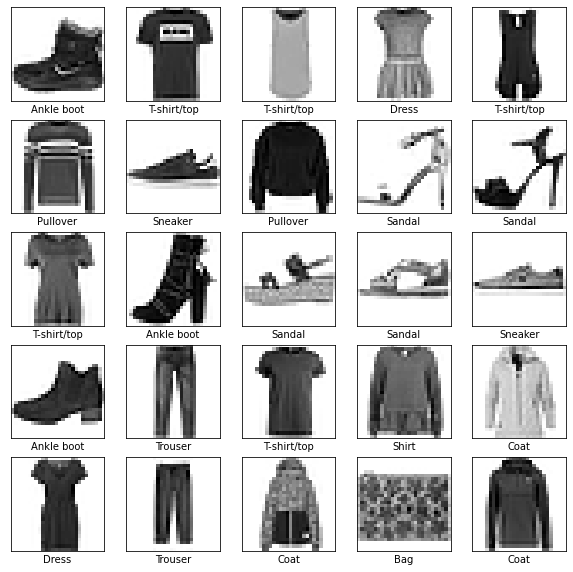

In [140]:
#TO SEE ALL IMAGES.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [141]:
#SETTING UP THE LAYERS:
#INPUT LAYER - FLATTEN THE 2DIMENSIONAL ARRY(28 X 28) INTO 1D ARRAY ()
#HIDDEN LAYER -DENSE FULLY CONNECTED LAYER OF 28 NODES (RELU)
#OUTPUT LAYER -DENSE FULLY CONNECTED LAYER OF 10 NODES (SOFTMAX)

In [142]:
#COMPILE AND OPTIMIZE THE NODE
#1.LOSS FUNCTION -MEASURES MEASURES HOW ACCURATE THE OUTPUT IS
#2.OPTIMIZER - MEASURES HOW THE MODEL IS UPDATED
#3.METRICS-MONITORS THE TRAINING TO DETERMINE WHEN TO STOP

In [143]:
# TRAINING THE MODEL:
# LETS SAY
# WE ARE GOING TO TRAIN THE MODEL IN 10 EPOCHS (THAT IS A COMPLETE PRESENTATION OF THE TRAINING DATASET)
# THIS MEANS THAT WE WOULD FEED THE 60,000 IMAGES AND LABELS INTO THE NETWORK 10 DIFFERENT TIMES
# FOR EACH EPOCH WE WOULD SEE BOTH THE LOSS AND THE ACCURACY OF THE MODEL  

In [144]:
#LETS SCALE DOWN OUR RGB VARAINT IMAGES TO GREY SCALE i.e so training is easy
train_images=train_images/255.0
test_images=test_images/255.0
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [177]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [146]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [147]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [148]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

INFO:tensorflow:Reloading Oracle from existing project output/Mnist Fashion/oracle.json
INFO:tensorflow:Reloading Tuner from output/Mnist Fashion/tuner0.json


In [149]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

INFO:tensorflow:Oracle triggered exit


In [150]:
model=tuner_search.get_best_models(num_models=1)[0]

In [151]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 112)       1120      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        179264    
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1982528   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 2,163,562
Trainable params: 2,163,562
Non-trainable params: 0
_________________________________________________________________


In [152]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1870 - accuracy: 0.9301 - val_loss: 0.2773 - val_accuracy: 0.9060
Epoch 5/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1408 - accuracy: 0.9476 - val_loss: 0.2752 - val_accuracy: 0.9130
Epoch 6/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1038 - accuracy: 0.9620 - val_loss: 0.3044 - val_accuracy: 0.9158
Epoch 7/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0749 - accuracy: 0.9716 - val_loss: 0.3283 - val_accuracy: 0.9112
Epoch 8/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0573 - accuracy: 0.9784 - val_loss: 0.3635 - val_accuracy: 0.9090
Epoch 9/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0433 - accuracy: 0.9845 - val_loss: 0.3884 - val_accuracy: 0.9070
Epoch 10/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0364 - accuracy: 0.9873 - val_loss: 0.4625 - val_accurac

In [153]:
#PREDICTIONS
# HERE WE HAVE 10K PREDICTIONS TO MAKE
print(test_images.shape)


(10000, 28, 28, 1)


In [154]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4689 - accuracy: 0.9141


In [155]:
predictions=model.predict(test_images)

In [156]:
test_images.shape

(10000, 28, 28, 1)

In [157]:
predictions.shape

(10000, 10)

In [158]:
# A PREDICTION IS AN ARRAY OF 10 NUMBERS
# EACH ELEMENT REPRESENTS THE CONFIDENCE THAT THE IMAGE CORESPONDS THAT THE TO THE EACH OF THE 10 DIFFERENT CLASSES
predictions[0]

array([1.3125877e-20, 6.5228443e-27, 6.3320125e-32, 2.9858965e-20,
       3.3072454e-26, 2.9132536e-16, 6.0680330e-25, 9.5094565e-19,
       1.4162752e-22, 1.0000000e+00], dtype=float32)

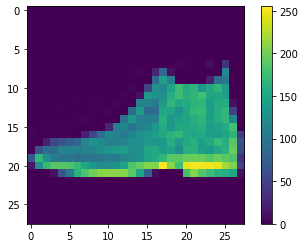

In [162]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()

In [163]:
#EVALUATE THE MODEL
# FUNCTION TO PLOT AN IMAGE
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array,true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if (predicted_label==true_label):
       color='green'
    else:
      color='red'
      plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)
#FUNCTION TO CREATE BARPLOT OF THE PREDICTIONS
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array,true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')      

**LETS CHECK FOR TWO PREDICTIONS**

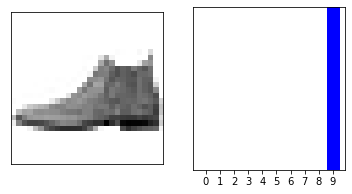

In [164]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

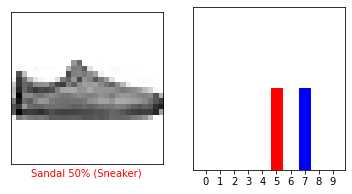

In [165]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

**LETS CHECK FOR ALL THE IMAGES IN THE TEST DATA**

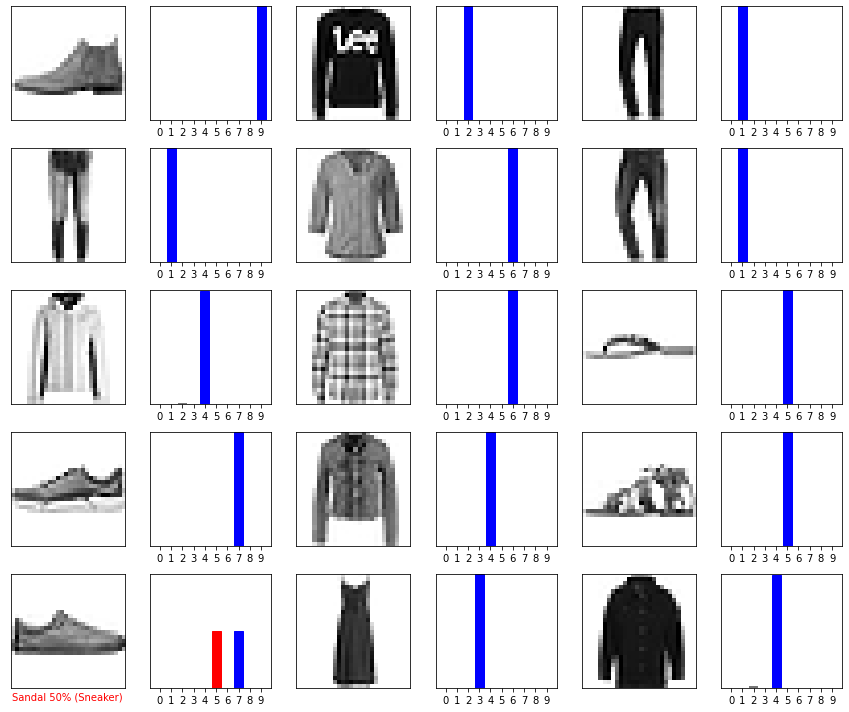

In [166]:
rows=5
cols=3
num_images=rows*cols
plt.figure(figsize=(2*2*cols,2*rows))
for i in range(num_images):
  plt.subplot(rows,2*cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(rows,2*cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

### **TESTING FOR ONE INDIVIDUAL IMAGE**

In [178]:

img=test_images[8]
img.shape

(28, 28, 1)

In [179]:
import numpy as np
img=np.expand_dims(img,0)
img.shape

(1, 28, 28, 1)

In [180]:
my_prediction=model.predict(img)
my_prediction

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

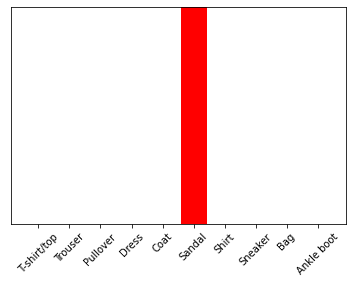

In [184]:
plot_value_array(1,my_prediction[0],test_labels)
_=plt.xticks(range(10),class_names,rotation=45)